## Instructions to run the NoteBook:


1. Change runtime type and select a GPU
2. Upload the train_data.csv file
3. Run the `Install Libraries` cell, (Make sure to uncomment it first)
4. Comment the Install Libraries cell, because we dont want to run it again.
5. Restrat the session and run all the cells.

All Done 🎊🎊



## Install Libraries

In [ ]:
# ! pip install transformers datasets
# !pip install evaluate
# !pip install accelerate -U

# 1. Data Preparation

## 1.1 Data Cleaning Using Pandas

**Observations:**
 - "comment_description" column has 3 missing values
 - There are 2 rows with sentiment label 'Irrelevant'
 - The model expects the input for training as `text` and predictions as `label`.
 So, Changing the column names of "comment_description" to "text" & "sentiment" to "label"
 - The 'campaign_id' & 'comment_id' cols should be removed, as they are not required for training.
 - In setiment column, replace `Positive : 1` & `Negative : 0` and change the data type to int

In [1]:
import pandas as pd
train_df = pd.read_csv("train_data.csv")
train_df

,campaign_id,comment_id,comment_description,sentiment
0,2212,17908351952371091,لخسارة الوزن الزائد والكرش بمدة قياسية مع عدم ...,Negative
1,2217,17935944230085744,🔥🔥🔥,Positive
2,2215S,17899518356507020,This is so good😍 would be great it If you add ...,Negative
3,2214,18014766136389857,😍,Positive
4,2203,17924318627206870,طبق رائع ومميز تبارك الرحمن تسلم ايدك يارب 😍,Positive
...,...,...,...,...
5495,2333,18023635696870040,🧿🧿🧿🧿🧿♾️♾️♾️♾️♾️,Positive
5496,2333,17895260024930497,@charletteginu the queen herself👸👏❤️,Negative
5497,2333,17906323568881994,@navneth_ 🤗,Positive
5498,2333,17968276586645560,❤️,Positive


In [2]:
# comment_description column has 3 NaN values

print(train_df.info())

train_df[train_df["comment_description"].isnull()==True]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5500 entries, 0 to 5499
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   campaign_id          5500 non-null   object
 1   comment_id           5500 non-null   int64 
 2   comment_description  5497 non-null   object
 3   sentiment            5500 non-null   object
dtypes: int64(1), object(3)
memory usage: 172.0+ KB
None


,campaign_id,comment_id,comment_description,sentiment
1090,2600_2,17979891167587327,NaN,Positive
5095,2333,18001116857040003,NaN,Positive
5284,2333,17963438963655825,NaN,Positive


In [3]:
# There are 2 rows with a sentiment 'Irrelevant'
print("Sentiment classes: ",train_df["sentiment"].unique())

train_df[train_df["sentiment"]=='Irrelevant']

Sentiment classes:  ['Negative' 'Positive' 'Irrelevant']


,campaign_id,comment_id,comment_description,sentiment
4922,2333,18015201037847853,"🙋🏻‍♂️Yeah, we are here to helping Users/influe...",Irrelevant
4923,2333,18053770063511458,"🙋🏻‍♂️Yeah, we are here to helping Users/influe...",Irrelevant


#### Observation about sentiment column:
Count of Positive sentiment is significantly greater than count of Negative sentiment. This can result in biasness in model results.

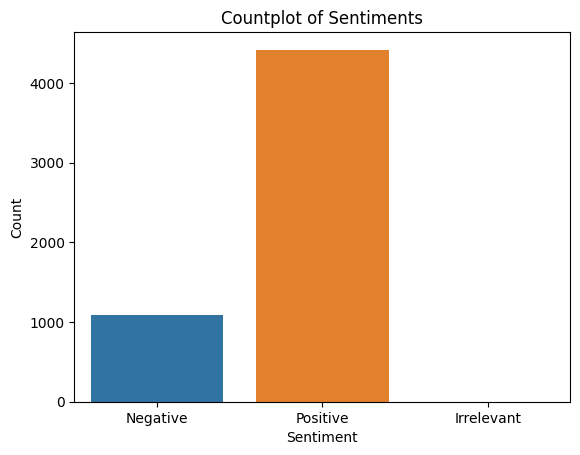

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create countplot
sns.countplot(data=train_df, x='sentiment', hue = "sentiment")
plt.title('Countplot of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

### Step 1: Removing missing values

In [ ]:
# Removing Null values
train_df = train_df.dropna()
print ("Null values count after Removal\n")
print (train_df.isnull().sum())

Null values count after Removal

campaign_id            0
comment_id             0
comment_description    0
sentiment              0
dtype: int64


### Step 2: Removing rows with sentiment label 'Irrelevant'

NOTE: As there are only 2 rows with 'Irrelevant' label, the sample size is not significant. Hence they can be dropped.

In [ ]:
# Removing rows with sentiment label
train_df = train_df[train_df["sentiment"]!='Irrelevant']
# Returns empty dataframe
train_df[train_df["sentiment"]=='Irrelevant']

,campaign_id,comment_id,comment_description,sentiment


### Step 3: Changing column names

In [ ]:
train_df.rename(columns={'comment_description': 'text', 'sentiment': 'label'}, inplace=True)
train_df.head(1)

<ipython-input-7-489f4d511470>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df.rename(columns={'comment_description': 'text', 'sentiment': 'label'}, inplace=True)


,campaign_id,comment_id,text,label
0,2212,17908351952371091,لخسارة الوزن الزائد والكرش بمدة قياسية مع عدم ...,Negative


### Step 4: Removing 'campaign_id' & 'comment_id' columns



In [ ]:
# Run this cell only 1 time after loading the dataframe

train_df = train_df.iloc[:, 2:]  # Excluding first two columns
train_df.head(1)

,text,label
0,لخسارة الوزن الزائد والكرش بمدة قياسية مع عدم ...,Negative


### Step 5: Renaming labels as,

- Positive: 1 & Negative: 0

- Also changing the data type of label

In [ ]:
# Replacing values and changing data type
train_df['label'] = train_df['label'].replace({'Positive': 1, 'Negative': 0}).astype(int)

# To check data type
train_df.info()
# To check updated labels
train_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5495 entries, 0 to 5499
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5495 non-null   object
 1   label   5495 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 128.8+ KB


,text,label
0,لخسارة الوزن الزائد والكرش بمدة قياسية مع عدم ...,0
1,🔥🔥🔥,1
2,This is so good😍 would be great it If you add ...,0
3,😍,1
4,طبق رائع ومميز تبارك الرحمن تسلم ايدك يارب 😍,1


### Splitting test and evaluation data

In [ ]:
# Total rows are 5,495

# 90% of total data is part of training data (1st 4945 rows)
train_df = train_df.iloc[:4945]
# 10% of total dataset is part of evaluation data (Last 550 rows)
eval_df = train_df.iloc[-550:]

## 1.2 Data Loading

loading data using 🤗 Dataset library

In [ ]:
from datasets import Dataset

# converting pandas dataframe into Hugging-face Dataset object

train_ds = Dataset.from_pandas(train_df, split="train")
eval_ds = Dataset.from_pandas(eval_df, split="eval")

In [ ]:
train_ds[0]

{'text': 'لخسارة الوزن الزائد والكرش بمدة قياسية مع عدم الرجوع للوزن مرة اخرى🤚\nحياكم بحسابي🥰',
 'label': 0,
 '__index_level_0__': 0}

In [ ]:
eval_ds[0]

{'text': 'تسلم الايادي التقديم والوصفه شيء فااخر ومميز 😍',
 'label': 1,
 '__index_level_0__': 4396}

In [ ]:
train_ds.features

{'text': Value(dtype='string', id=None),
 'label': Value(dtype='int64', id=None),
 '__index_level_0__': Value(dtype='int64', id=None)}

In [ ]:
eval_ds.features

{'text': Value(dtype='string', id=None),
 'label': Value(dtype='int64', id=None),
 '__index_level_0__': Value(dtype='int64', id=None)}

## 1.3 Data Pre processing

Setting up tokenizer

The next step is to load a DistilBERT tokenizer to preprocess the `text` field:

In [ ]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Creating a preprocessing function to tokenize `text` and truncate sequences to be no longer than DistilBERT's maximum input length:

In [ ]:
def preprocess_function(examples):
    return tokenizer(examples["text"], truncation=True)

Applying preprocessing function over the entire dataset, using 🤗 Datasets map function. Adding argument `batched=True` to speed up the process by processing multiple elements of the dataset at once:

In [ ]:
tokenized_train_ds = train_ds.map(preprocess_function, batched=True)
tokenized_eval_ds = eval_ds.map(preprocess_function, batched=True)

Map:   0%|          | 0/4945 [00:00<?, ? examples/s]

Map:   0%|          | 0/550 [00:00<?, ? examples/s]


Defining DataCollatorWithPadding, to create a batch of dataset. It will *dynamically pad* the sentences to the longest length in a batch during collation.

In [ ]:
from transformers import DataCollatorWithPadding

data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

# 2. Model Fine-tuning:
Fine-tune a BERT model for sentiment analysis on Arabic and English data.

## 2.1 Evaluate

Setting up 🤗 Evaluate library, to evaluate model perfomance during training. For this task, load the accuracy metric.

In [ ]:
import evaluate

accuracy = evaluate.load("accuracy")

In [ ]:
import numpy as np


def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    predictions = np.argmax(predictions, axis=1)
    return accuracy.compute(predictions=predictions, references=labels)

## 2.2 Train

I have used pytorch implementation by hugging face to fineTune the model

Creating a map of the expected ids to their labels with id2label and label2id:

In [ ]:
id2label = {0: "NEGATIVE", 1: "POSITIVE"}
label2id = {"NEGATIVE": 0, "POSITIVE": 1}

Load DistilBERT with AutoModelForSequenceClassification along with the number of expected labels, and the label mappings:

In [ ]:
from transformers import AutoModelForSequenceClassification, TrainingArguments, Trainer

model = AutoModelForSequenceClassification.from_pretrained(
    "distilbert-base-uncased", num_labels=2, id2label=id2label, label2id=label2id
)

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Final 3 steps:


1.   Define training hyperparameters in TrainingArguments.
2.   Pass the training arguments to Trainer, along with other args
3.   Call train() to finetune model





In [ ]:
training_args = TrainingArguments(
    output_dir="my_awesome_model", # output directory
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=2,
    weight_decay=0.01,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
)

trainer = Trainer(
    model=model,
    args=training_args,   # training arguments, defined above
    train_dataset=tokenized_train_ds,   # training dataset
    eval_dataset=tokenized_eval_ds,     # evaluation dataset
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics,
)

trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy
1,No log,0.320627,0.856364
2,0.405700,0.273297,0.867273


TrainOutput(global_step=620, training_loss=0.3915190358315745, metrics={'train_runtime': 90.7911, 'train_samples_per_second': 108.931, 'train_steps_per_second': 6.829, 'total_flos': 212176033641816.0, 'train_loss': 0.3915190358315745, 'epoch': 2.0})

# 3. Saving Model Locally

In [ ]:
from google.colab import files
import shutil

def zip_and_download(folder_path, zip_path):
    # Create a zip file
    shutil.make_archive(zip_path, 'zip', folder_path)
    # Download the zip file locally
    files.download(zip_path + '.zip')

folder_path = "./my_awesome_model/checkpoint-620"
zip_path = "./my_awesome_model_checkpoint_620"

# Zip the folder and download it locally
zip_and_download(folder_path, zip_path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# 4. Inference

In [ ]:
from transformers import pipeline

classifier = pipeline("sentiment-analysis", model="./my_awesome_model/checkpoint-620")
classifier("I love hugging face <3")

[{'label': 'POSITIVE', 'score': 0.7694248557090759}]

In [ ]:
# In arabic
classifier("❤️❤️أحب احتضان الوجه")

[{'label': 'POSITIVE', 'score': 0.6868372559547424}]

# References:


1.   https://huggingface.co/docs/datasets/en/tabular_load#pandas-dataframes
2. https://huggingface.co/docs/datasets/en/loading#slice-splits
3.   https://discuss.huggingface.co/t/the-model-did-not-return-a-loss-from-the-inputs-only-the-following-keys-logits-for-reference-the-inputs-it-received-are-input-values/25420/17
4. https://huggingface.co/docs/transformers/tasks/sequence_classification#text-classification
5. https://discuss.huggingface.co/t/how-to-save-my-model-to-use-it-later/20568/6



